# Pandas

In [1]:
import pandas as pd

## DataFrames

Los DataFrames son el caballo de batalla de los pandas y están directamente inspirados en el lenguaje de programación R.Los DataFrames son una estructura de datos bidimensional, los datos se alinean de forma tabular en filas y columnas.

In [2]:
df = pd.read_csv("Sales.csv")

In [3]:
df

,Company,Person,Sales,Compensation
0,GOOG,Sam,30,3000.0
1,GOOG,Charlie,34,3500.0
2,MSFT,Amy,54,NaN
3,MSFT,Vanessa,23,2800.0
4,FB,Carl,45,5000.0
5,FB,Sarah,12,1200.0


### Seleccion y indexado

In [4]:
df["Company"]

0    GOOG
1    GOOG
2    MSFT
3    MSFT
4      FB
5      FB
Name: Company, dtype: object

In [5]:
df[["Company", "Person"]]

,Company,Person
0,GOOG,Sam
1,GOOG,Charlie
2,MSFT,Amy
3,MSFT,Vanessa
4,FB,Carl
5,FB,Sarah


** Nuevas columnas **

In [6]:
df["perSale"] = df["Compensation"] / df["Sales"]

In [7]:
df["perSale"]

0    100.000000
1    102.941176
2           NaN
3    121.739130
4    111.111111
5    100.000000
Name: perSale, dtype: float64

** Remover columnas **

In [8]:
df.drop("perSale", axis=1)

,Company,Person,Sales,Compensation
0,GOOG,Sam,30,3000.0
1,GOOG,Charlie,34,3500.0
2,MSFT,Amy,54,NaN
3,MSFT,Vanessa,23,2800.0
4,FB,Carl,45,5000.0
5,FB,Sarah,12,1200.0


In [9]:
df

,Company,Person,Sales,Compensation,perSale
0,GOOG,Sam,30,3000.0,100.000000
1,GOOG,Charlie,34,3500.0,102.941176
2,MSFT,Amy,54,NaN,NaN
3,MSFT,Vanessa,23,2800.0,121.739130
4,FB,Carl,45,5000.0,111.111111
5,FB,Sarah,12,1200.0,100.000000


** Seleccionar filas **

In [10]:
import numpy as np

In [11]:
df_1 = pd.DataFrame(np.random.randn(5,4),index="A B C D E".split(),columns="W X Y Z".split())

In [12]:
df_1.loc["A"]

W   -1.452813
X   -1.409874
Y    0.343763
Z    0.604567
Name: A, dtype: float64

In [13]:
df_1.loc["A", "Y"]

0.3437625671848534

** Seleccion condicional **

In [14]:
df>0

,Company,Person,Sales,Compensation,perSale
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,False,False
3,True,True,True,True,True
4,True,True,True,True,True
5,True,True,True,True,True


In [15]:
df[df>0]

,Company,Person,Sales,Compensation,perSale
0,GOOG,Sam,30,3000.0,100.000000
1,GOOG,Charlie,34,3500.0,102.941176
2,MSFT,Amy,54,NaN,NaN
3,MSFT,Vanessa,23,2800.0,121.739130
4,FB,Carl,45,5000.0,111.111111
5,FB,Sarah,12,1200.0,100.000000


In [16]:
df[df["Sales"]>20]

,Company,Person,Sales,Compensation,perSale
0,GOOG,Sam,30,3000.0,100.000000
1,GOOG,Charlie,34,3500.0,102.941176
2,MSFT,Amy,54,NaN,NaN
3,MSFT,Vanessa,23,2800.0,121.739130
4,FB,Carl,45,5000.0,111.111111


In [17]:
df[df["Sales"]>20]["Sales"]

0    30
1    34
2    54
3    23
4    45
Name: Sales, dtype: int64

In [18]:
df[(df["Sales"]>20) & (df["Sales"] < 30)]

,Company,Person,Sales,Compensation,perSale
3,MSFT,Vanessa,23,2800.0,121.73913


### Operaciones

In [19]:
df["Company"].unique()

array(['GOOG', 'MSFT', 'FB'], dtype=object)

In [20]:
df["Company"].nunique()

3

In [21]:
df["Company"].value_counts()

FB      2
MSFT    2
GOOG    2
Name: Company, dtype: int64

** Aplicar funciones **

In [22]:
def times2(x):
    return x*2

In [23]:
df["Sales"].apply(times2)

0     60
1     68
2    108
3     46
4     90
5     24
Name: Sales, dtype: int64

In [24]:
df["Compensation"].apply(lambda x: x*2)

0     6000.0
1     7000.0
2        NaN
3     5600.0
4    10000.0
5     2400.0
Name: Compensation, dtype: float64

In [25]:
df["Person"].apply(len)

0    3
1    7
2    3
3    7
4    4
5    5
Name: Person, dtype: int64

In [26]:
df["Sales"].sum()

198

In [27]:
df["Compensation"].mean()

3100.0

In [28]:
df.describe()

,Sales,Compensation,perSale
count,6.000000,5.000000,5.000000
mean,33.000000,3100.000000,107.158284
std,15.073155,1367.479433,9.333970
min,12.000000,1200.000000,100.000000
25%,24.750000,2800.000000,100.000000
50%,32.000000,3000.000000,102.941176
75%,42.250000,3500.000000,111.111111
max,54.000000,5000.000000,121.739130


### Tratamiento para falta de datos

In [29]:
df.isnull()

,Company,Person,Sales,Compensation,perSale
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,True,True
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False


In [30]:
df.dropna()

,Company,Person,Sales,Compensation,perSale
0,GOOG,Sam,30,3000.0,100.000000
1,GOOG,Charlie,34,3500.0,102.941176
3,MSFT,Vanessa,23,2800.0,121.739130
4,FB,Carl,45,5000.0,111.111111
5,FB,Sarah,12,1200.0,100.000000


In [31]:
df.dropna(axis=1)

,Company,Person,Sales
0,GOOG,Sam,30
1,GOOG,Charlie,34
2,MSFT,Amy,54
3,MSFT,Vanessa,23
4,FB,Carl,45
5,FB,Sarah,12


In [32]:
df.fillna(0)

,Company,Person,Sales,Compensation,perSale
0,GOOG,Sam,30,3000.0,100.000000
1,GOOG,Charlie,34,3500.0,102.941176
2,MSFT,Amy,54,0.0,0.000000
3,MSFT,Vanessa,23,2800.0,121.739130
4,FB,Carl,45,5000.0,111.111111
5,FB,Sarah,12,1200.0,100.000000


In [33]:
df["Compensation"].fillna(df["Compensation"].mean())

0    3000.0
1    3500.0
2    3100.0
3    2800.0
4    5000.0
5    1200.0
Name: Compensation, dtype: float64

### Groupby (Agrupado por x)

In [34]:
company = df.groupby("Company")

In [35]:
company.mean()

,Sales,Compensation,perSale
Company,,,
FB,28.5,3100.0,105.555556
GOOG,32.0,3250.0,101.470588
MSFT,38.5,2800.0,121.739130


In [36]:
company.std()

,Sales,Compensation,perSale
Company,,,
FB,23.334524,2687.005769,7.856742
GOOG,2.828427,353.553391,2.079726
MSFT,21.920310,NaN,NaN


In [37]:
company.describe()

Compensation                                                       \
               count    mean          std     min     25%     50%     75%   
Company                                                                     
FB               2.0  3100.0  2687.005769  1200.0  2150.0  3100.0  4050.0   
GOOG             2.0  3250.0   353.553391  3000.0  3125.0  3250.0  3375.0   
MSFT             1.0  2800.0          NaN  2800.0  2800.0  2800.0  2800.0   

                Sales           ...                  perSale              \
            max count  mean     ...        75%   max   count        mean   
Company                         ...                                        
FB       5000.0   2.0  28.5     ...      36.75  45.0     2.0  105.555556   
GOOG     3500.0   2.0  32.0     ...      33.00  34.0     2.0  101.470588   
MSFT     2800.0   2.0  38.5     ...      46.25  54.0     1.0  121.739130   

                                                                              
              std        min         25%         50%         75%         max  
Company                                                                       
FB       7.856742  100.00000  102.777778  105.555556  108.333333  111.111111  
GOOG     2.079726  100.00000  100.735294  101.470588  102.205882  102.941176  
MSFT          NaN  121.73913  121.739130  121.739130  121.739130  121.739130  

[3 rows x 24 columns]

In [38]:
df.to_csv('ejemplo',index=False)

# Matplotlib

Matplotlib es la biblioteca visualización de datos para Python. Fue creado por John Hunter. Fue creado para intentar replicar las capacidades de trazado de MatLab (otro lenguaje de programación) en Python.

In [39]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

** Datos **

In [40]:
x = np.linspace(0, 5, 11)
y = x ** 2

## Commandos Basicos

Text(0,0.5,'Etiqueta Y')

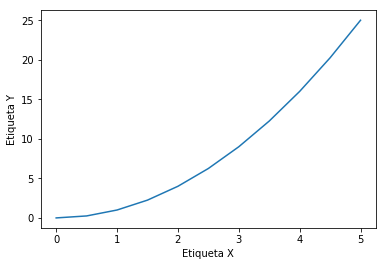

In [41]:
plt.plot(x, y)
plt.xlabel("Etiqueta X")
plt.ylabel("Etiqueta Y")
#plt.show()

## Multiples plots en el mismo canvas

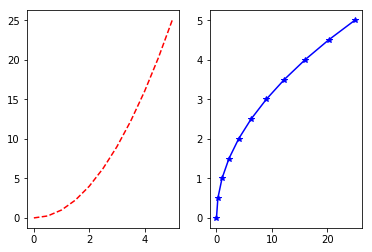

In [42]:
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(y, x, 'b*-');

## Matplotlib orientado a objeto

Text(0.5,1,'Set Title')

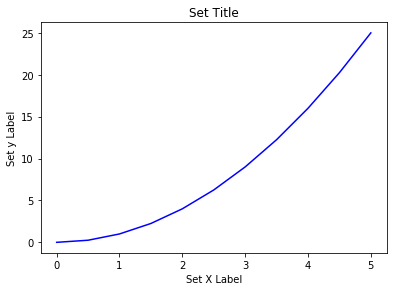

In [43]:
# Crear Figura (canvas vacio)
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # Izquierda, Abajo, Ancho, Alto (Rango entre 0 y 1)

# Plot
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label')
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

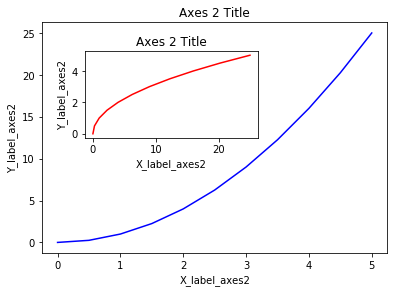

In [44]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

## Guardar Figuras

In [45]:
fig.savefig("nombre.png")

In [46]:
fig.savefig("nombre.png", dpi=200)

## Tipos especiales de plots

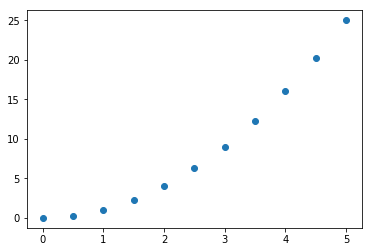

In [47]:
plt.scatter(x, y)

(array([10.,  9., 14.,  6.,  5.,  9., 17.,  9., 10., 11.]),
 array([ 17. , 114.8, 212.6, 310.4, 408.2, 506. , 603.8, 701.6, 799.4,
        897.2, 995. ]),
 <a list of 10 Patch objects>)

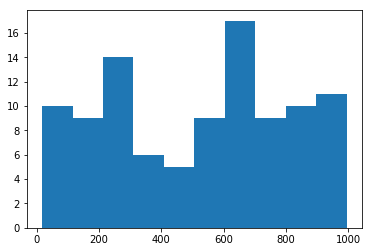

In [48]:
from random import sample
data = sample(range(1, 1000), 100)

plt.hist(data)

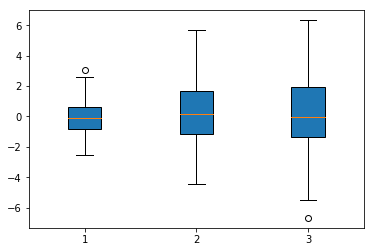

In [49]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

plt.boxplot(data,vert=True,patch_artist=True);  